__Import Library__

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

__Basic Preprocessing:__

_<b>Transform to convert images to tensors and normalize them<b>_

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,)) 
])

__Load the MNIST dataset with transformations applied__

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

__Load datasets into DataLoader__

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

__Function to display a batch of 25 images__

In [5]:
def show_batch(images, labels):
    fig, ax = plt.subplots(5, 5, figsize=(12, 12))  # 5x5 grid for 25 images
    ax = ax.flatten()  # Flatten the axes for easy iteration
    
    for i in range(25):  # Loop over the first 25 images
        ax[i].imshow(images[i].numpy().squeeze(), cmap='gray')
        ax[i].set_title(f'Label: {labels[i].item()}')
        ax[i].axis('off')  # Turn off axis labels and ticks
    
    plt.tight_layout()
    plt.show()

__Fetch a batch of data and display 25 images__

In [6]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

__Show the first 25 images from the batch__

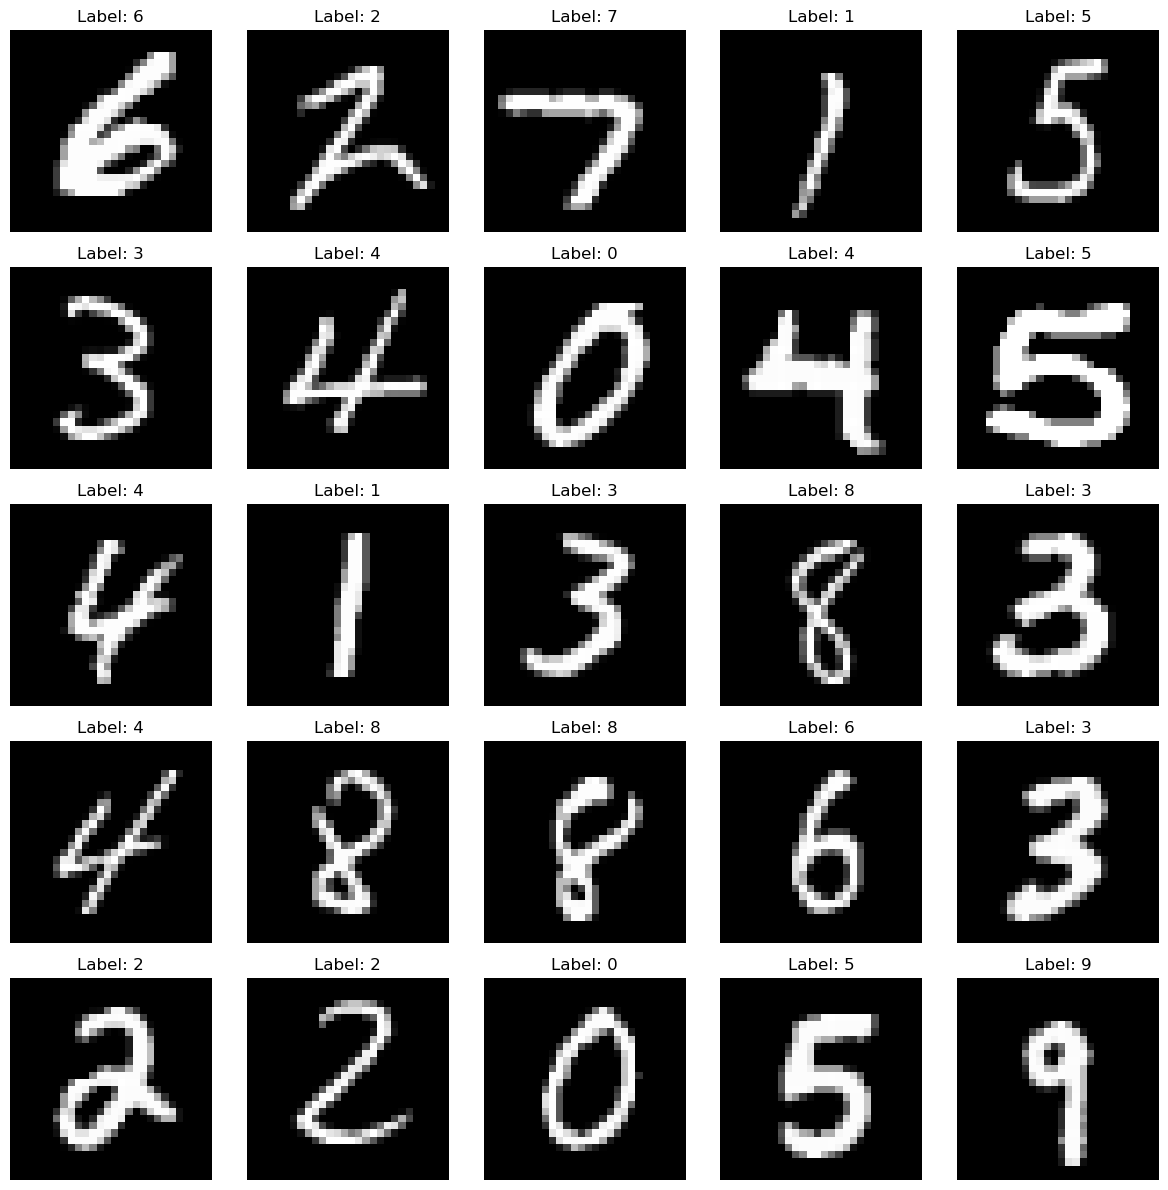

In [7]:
show_batch(images[:25], labels[:25])

__Advanced   Preprocessing   Techniques:__

$A. Data Augmentation:$

In [8]:
transform = transforms.Compose([
    transforms.RandomRotation(10),  
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

$B. Custom Transformation:$

In [9]:
def binarize_image(img):
    return img > 0.5 

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda img: binarize_image(img)),
    transforms.Normalize((0.1307,), (0.3081,))
])

$C. Resizing:$

In [10]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

$D. Flattening Images:$

In [11]:
class FlattenTransform:
    def __call__(self, img):
        return img.view(-1)  

transform = transforms.Compose([
    transforms.ToTensor(),
    FlattenTransform(),  
    transforms.Normalize((0.1307,), (0.3081,))
])


$E. Pixel Intensity Scaling:$

In [12]:
class ScalePixels:
    def __call__(self, img):
        return img * 255  

transform = transforms.Compose([
    transforms.ToTensor(),
    ScalePixels(),
    transforms.Normalize((0.1307,), (0.3081,))
])


**Import Library**

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import precision_score

**Connect the input, hidden or Output layer and Apply ReLu Activation**

In [14]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  
        self.fc2 = nn.Linear(256, 128)    
        self.fc3 = nn.Linear(128, 10)     

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        x = self.fc3(x)          
        return x

**Initialize Model, Loss Function, and Optimizer**

In [15]:
model = MLP()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**Train the MLP Model**

In [16]:
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()  
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


**Test the Model**

In [17]:
def test(model, test_loader):
    model.eval()  
    correct = 0
    total = 0
    with torch.no_grad():  
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

**Run Training & Testing**

In [18]:
train(model, train_loader, criterion, optimizer, num_epochs=5)
test(model, test_loader)

Epoch [1/5], Loss: 0.2259
Epoch [2/5], Loss: 0.0920
Epoch [3/5], Loss: 0.0646
Epoch [4/5], Loss: 0.0495
Epoch [5/5], Loss: 0.0398
Test Accuracy: 98.15%


***Advanced MLP***

In [19]:
class AdvancedMLP(nn.Module):
    def __init__(self):
        super(AdvancedMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.bn1 = nn.BatchNorm1d(512)  
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)  
        self.fc5 = nn.Linear(64, 10)   
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.bn1(self.fc1(x)))  
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.dropout(F.relu(self.fc4(x)))  
        x = self.fc5(x)
        return x

***Instantiate model, loss function, and optimizer***

In [20]:
model = AdvancedMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

***Function to calculate precision***

In [21]:
def calculate_precision(labels, predicted):
    labels = labels.cpu().numpy()  
    predicted = predicted.cpu().numpy()
    return precision_score(labels, predicted, average='macro') 

***Lists to track the metrics***

In [22]:
train_losses = []
test_losses = []
test_accuracies = []
test_precisions = []

***Train Function***

In [23]:
def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()  
    for epoch in range(num_epochs):
        running_loss = 0.0
        all_labels = []
        all_predictions = []
        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels)
            all_predictions.extend(predicted)

        precision = calculate_precision(torch.tensor(all_labels), torch.tensor(all_predictions))

        train_losses.append(running_loss / len(train_loader))

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Precision: {precision:.4f}')

***Test Function***

In [24]:
def test(model, test_loader, criterion):
    model.eval()  
    total = 0
    correct = 0
    total_loss = 0.0
    all_labels = []
    all_predictions = []
    with torch.no_grad():  
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels)
            all_predictions.extend(predicted)

    precision = calculate_precision(torch.tensor(all_labels), torch.tensor(all_predictions))
    accuracy = 100 * correct / total
    avg_loss = total_loss / len(test_loader)

    test_losses.append(avg_loss)
    test_accuracies.append(accuracy)
    test_precisions.append(precision)

    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%, Test Precision: {precision:.4f}')

***Train and Test the advanced MLP Model***

In [25]:
num_epochs = 5
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer, num_epochs=1)
    test(model, test_loader, criterion)

Epoch [1/1], Loss: 0.2954, Precision: 0.9204
Test Loss: 0.1096, Test Accuracy: 96.69%, Test Precision: 0.9668
Epoch [1/1], Loss: 0.1326, Precision: 0.9645
Test Loss: 0.0796, Test Accuracy: 97.71%, Test Precision: 0.9770
Epoch [1/1], Loss: 0.0937, Precision: 0.9741
Test Loss: 0.0695, Test Accuracy: 98.01%, Test Precision: 0.9801
Epoch [1/1], Loss: 0.0751, Precision: 0.9797
Test Loss: 0.0742, Test Accuracy: 97.91%, Test Precision: 0.9791
Epoch [1/1], Loss: 0.0620, Precision: 0.9828
Test Loss: 0.0899, Test Accuracy: 97.61%, Test Precision: 0.9758


***Graph of Loss, Accuracy and Precision Plot***

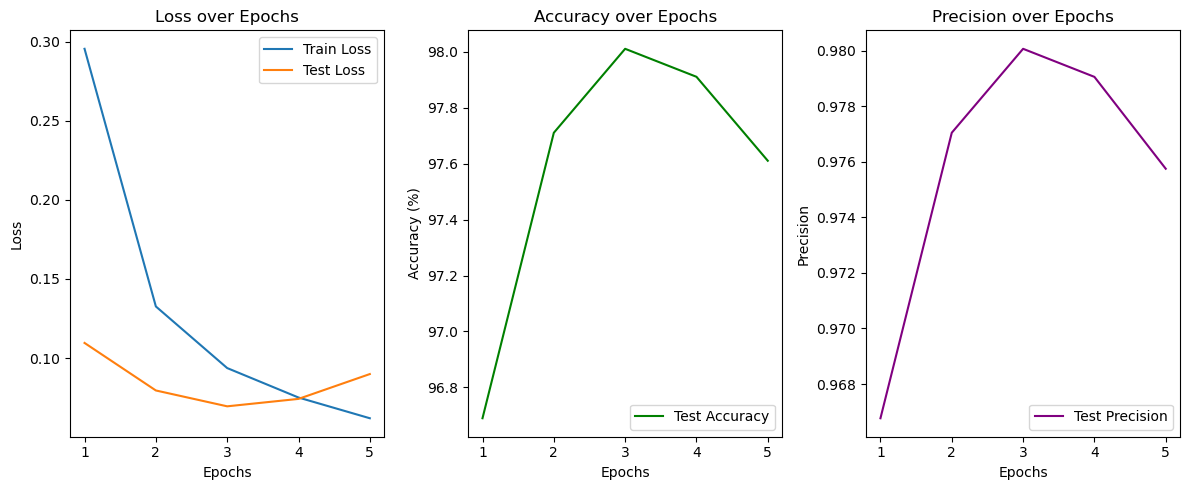

In [26]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs_range, test_accuracies, label='Test Accuracy', color='green')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs_range, test_precisions, label='Test Precision', color='purple')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

***Import Library***

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

***Apply difference difference transform technique***

In [28]:
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizing the images
])

# Load MNIST Dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


***Visualize the Abnormal Image***

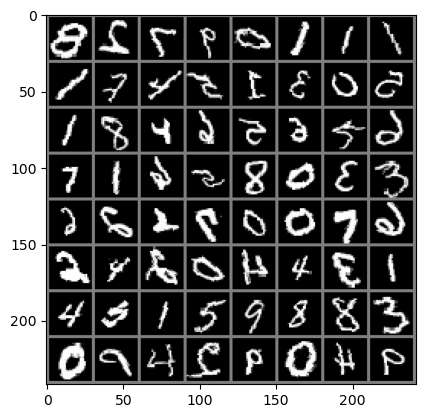

In [29]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data and display images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


***Apply CNN Model***

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


***Apply CNN Model, Cross Entropy Loss Function and Adam Optimizer***

In [31]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


***Define CNN architectures***

In [45]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [46]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

***Function to train the model***

In [47]:
def train_model(model, train_loader, test_loader, epochs, criterion, optimizer, device):
    model.to(device)
    history = {'train_loss': [], 'test_accuracy': []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        history['train_loss'].append(avg_loss)

        # Test accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        history['test_accuracy'].append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    return history

***Dataset Preparation***

In [50]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

***Experiment with different models and epochs***

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models = {'LeNet': LeNet(), 'SimpleCNN': SimpleCNN()}
epochs_list = [5, 10, 20]  # Different epoch counts

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    for epochs in epochs_list:
        print(f"Running {epochs} epochs...")
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        history = train_model(model, train_loader, test_loader, epochs, criterion, optimizer, device)
        results[f"{model_name}_{epochs}"] = history

Training LeNet...
Running 5 epochs...
Epoch 1/5, Loss: 0.2643, Test Accuracy: 97.41%
Epoch 2/5, Loss: 0.0731, Test Accuracy: 98.21%
Epoch 3/5, Loss: 0.0514, Test Accuracy: 98.59%
Epoch 4/5, Loss: 0.0417, Test Accuracy: 98.51%
Epoch 5/5, Loss: 0.0347, Test Accuracy: 98.79%
Running 10 epochs...
Epoch 1/10, Loss: 0.0319, Test Accuracy: 98.79%
Epoch 2/10, Loss: 0.0245, Test Accuracy: 98.95%
Epoch 3/10, Loss: 0.0225, Test Accuracy: 98.69%
Epoch 4/10, Loss: 0.0181, Test Accuracy: 98.96%
Epoch 5/10, Loss: 0.0175, Test Accuracy: 98.96%
Epoch 6/10, Loss: 0.0159, Test Accuracy: 98.75%
Epoch 7/10, Loss: 0.0142, Test Accuracy: 98.91%
Epoch 8/10, Loss: 0.0116, Test Accuracy: 99.06%
Epoch 9/10, Loss: 0.0108, Test Accuracy: 98.92%
Epoch 10/10, Loss: 0.0114, Test Accuracy: 98.89%
Running 20 epochs...
Epoch 1/20, Loss: 0.0104, Test Accuracy: 99.01%
Epoch 2/20, Loss: 0.0087, Test Accuracy: 98.92%
Epoch 3/20, Loss: 0.0099, Test Accuracy: 98.98%
Epoch 4/20, Loss: 0.0076, Test Accuracy: 98.92%
Epoch 5/20, 

***Plot Results***

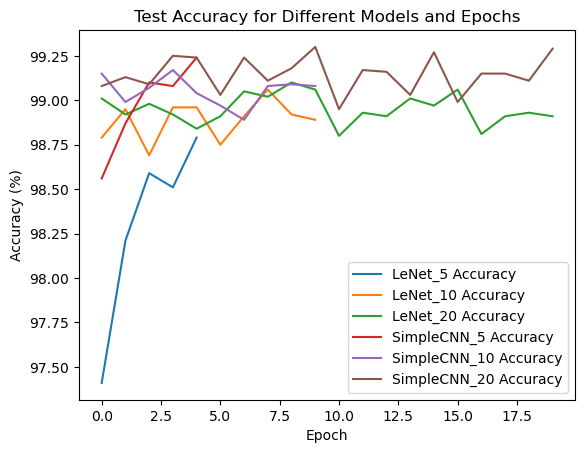

In [55]:
for key, value in results.items():
    plt.plot(value['test_accuracy'], label=f"{key} Accuracy")
plt.title("Test Accuracy for Different Models and Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

***LeNet-5 Model Implementation***

In [32]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2) 
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
lenet_model = LeNet5()


***Training and Testing Functions***

In [33]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet_model.parameters(), lr=0.001)

# Train the model
train(lenet_model, trainloader, criterion, optimizer, num_epochs=5)

# Test the model
test(lenet_model, testloader, criterion)


Epoch [1/5], Loss: 0.5661, Precision: 0.8095
Epoch [2/5], Loss: 0.2196, Precision: 0.9296
Epoch [3/5], Loss: 0.1598, Precision: 0.9497
Epoch [4/5], Loss: 0.1342, Precision: 0.9571
Epoch [5/5], Loss: 0.1175, Precision: 0.9622
Test Loss: 0.5728, Test Accuracy: 84.25%, Test Precision: 0.8799


***Generating Unseen Data***

In [34]:
unseen_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomAffine(0, shear=15, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load unseen data
unseen_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=unseen_transform)
unseen_loader = torch.utils.data.DataLoader(unseen_dataset, batch_size=64, shuffle=False)

# Test on unseen data
test(lenet_model, unseen_loader, criterion)


Test Loss: 0.2687, Test Accuracy: 91.52%, Test Precision: 0.9166


***Visualizing Results***

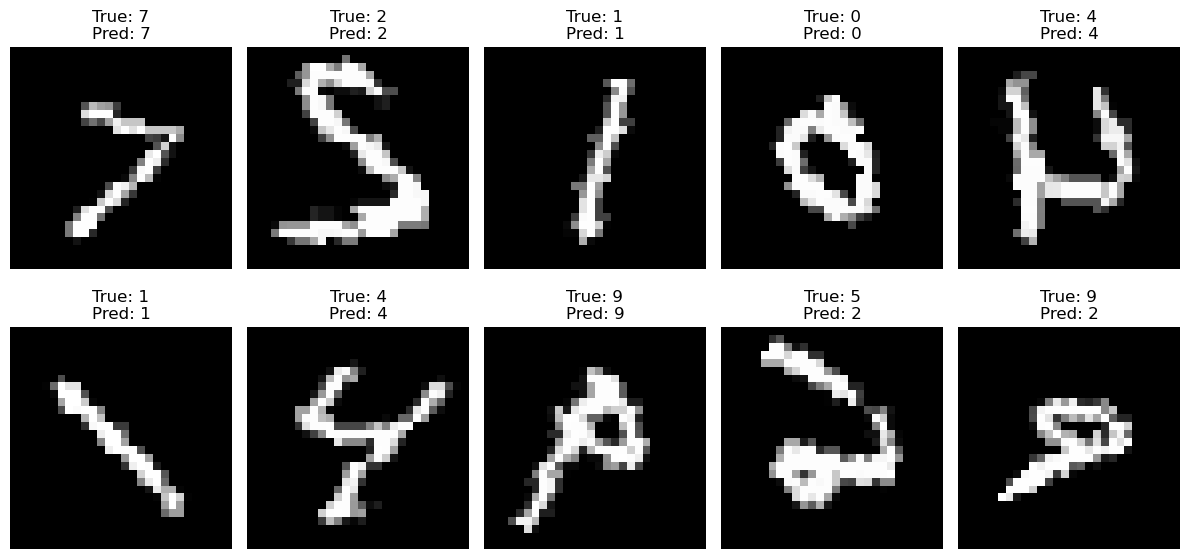

In [35]:
def visualize_predictions(model, data_loader):
    model.eval()
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Display images and predictions
    plt.figure(figsize=(12, 6))
    for idx in range(10):
        plt.subplot(2, 5, idx + 1)
        plt.imshow(images[idx].squeeze().numpy(), cmap='gray')
        plt.title(f"True: {labels[idx]}\nPred: {predicted[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(lenet_model, unseen_loader)


___1. Augmentation on MNIST Test Data___

In [36]:
# Define augmentation transformations
unseen_transform = transforms.Compose([
    transforms.RandomRotation(30),          # Rotate images randomly up to 30 degrees
    transforms.RandomAffine(0, shear=10),   # Apply random shearing
    transforms.RandomHorizontalFlip(),      # Flip images horizontally
    transforms.ColorJitter(brightness=0.5, contrast=0.5),  # Adjust brightness and contrast
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Apply these transformations to the original test data
unseen_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=unseen_transform)
unseen_loader = torch.utils.data.DataLoader(unseen_dataset, batch_size=64, shuffle=False)


___2. Combining Datasets___

In [37]:
# Load Fashion-MNIST as unseen data
fashion_mnist = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
fashion_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=64, shuffle=False)

# Test on Fashion-MNIST
test(lenet_model, fashion_loader, criterion)


Test Loss: 2.8601, Test Accuracy: 14.70%, Test Precision: 0.1830


___3. Synthetic Data Generation___

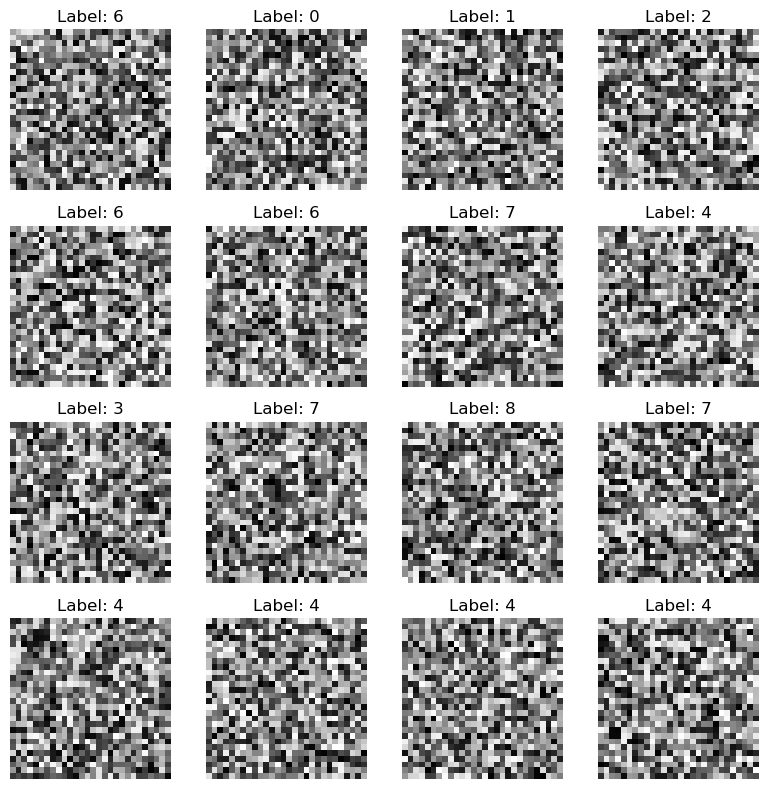

In [38]:
import numpy as np

def generate_synthetic_digits(size=64):
    synthetic_images = np.random.rand(size, 28, 28)  # Random grayscale images
    synthetic_images = torch.tensor(synthetic_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
    synthetic_labels = torch.randint(0, 10, (size,))  # Random labels
    return synthetic_images, synthetic_labels

# Generate synthetic unseen data
synthetic_images, synthetic_labels = generate_synthetic_digits(size=64)

# Visualize a few synthetic samples
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(synthetic_images[i].squeeze().numpy(), cmap='gray')
    plt.title(f"Label: {synthetic_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


___4. Noise Injection___

In [39]:
# Add Gaussian noise
class AddGaussianNoise:
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, img):
        noise = torch.randn(img.size()) * self.std + self.mean
        noisy_img = img + noise
        return torch.clamp(noisy_img, 0.0, 1.0)  # Ensure pixel values remain valid

# Apply noise transformation
unseen_transform = transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(mean=0.0, std=0.5),  # Adding noise
    transforms.Normalize((0.5,), (0.5,))
])

unseen_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=unseen_transform)
unseen_loader = torch.utils.data.DataLoader(unseen_dataset, batch_size=64, shuffle=False)


___5. Resizing to Different Dimensions___

In [40]:
# Resize images to 32x32
unseen_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

unseen_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=unseen_transform)
unseen_loader = torch.utils.data.DataLoader(unseen_dataset, batch_size=64, shuffle=False)


___6. Real-World Dataset Mapping___

In [41]:
from torchvision.datasets import SVHN

# Load SVHN Dataset
svhn_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((28, 28)),                  # Resize to match MNIST
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

svhn_dataset = SVHN(root='./data', split='test', download=True, transform=svhn_transform)
svhn_loader = torch.utils.data.DataLoader(svhn_dataset, batch_size=64, shuffle=False)

# Test on SVHN
test(lenet_model, svhn_loader, criterion)


Using downloaded and verified file: ./data\test_32x32.mat
Test Loss: 2.3103, Test Accuracy: 20.32%, Test Precision: 0.3156


___7. Adversarial Examples___

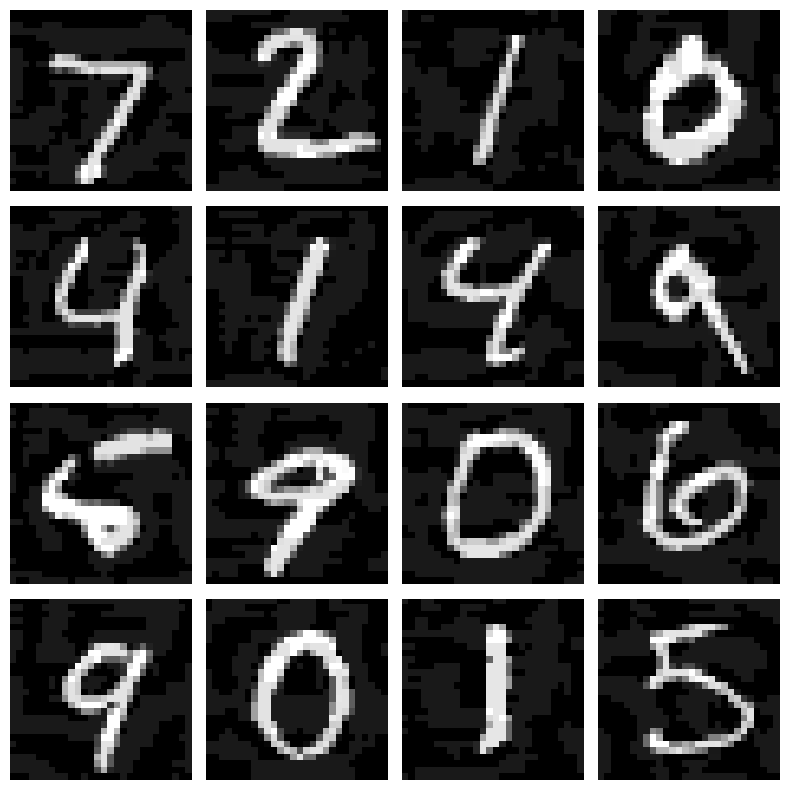

In [42]:
def fgsm_attack(image, epsilon, gradient):
    # Generate perturbed image by adding scaled gradient
    perturbed_image = image + epsilon * gradient.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)  # Ensure valid pixel range
    return perturbed_image

# Example Usage
epsilon = 0.1
data_iter = iter(testloader)
images, labels = next(data_iter)
images.requires_grad = True

outputs = lenet_model(images)
loss = criterion(outputs, labels)
loss.backward()

# Generate adversarial examples
perturbed_images = fgsm_attack(images, epsilon, images.grad)

# Visualize perturbed images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(perturbed_images[i].detach().squeeze().numpy(), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
